<a href="https://colab.research.google.com/github/EduardR7/social-net/blob/main/social_net2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![AMD Sense MI Machine](https://www.amd.com/system/files/102426-sense-mi-machine-intelligent-1260x709.jpg)


# Определение уровня социальных связей
На примере данных КХЛ

## Общие данные о проекте

### Заказчик:
Сетевое издание

### Цель проекта:
Оценить уровень социальных связей в КХЛ, расчитать Диаметр графа знакомств (ДГЗ, число Эрдёша-Бэйкона, число Лемтюгова и т.д.).
<p> Сделать статистическую проверку нескольких распространенных утверждений


### План:
1. Описание данных
2. Загрузка данных и подготовка их к анализу
3. Расчет числа характеризующего уровень социаальных связей, правило "5-и рукопожатий"
4. Описание и визуализация графа
5. Проверка статистических гипотез
6. Выводы


## [Описание датасетов](https://github.com/EduardR7/social-net/blob/main/.img/social-net-holo1.html)

In [413]:
import requests
from IPython.display import display, HTML

In [414]:
url = 'https://github.com/EduardR7/social-net/blob/main/.img/index.html'
response = requests.get(url)
html_content = response.text
display(HTML(html_content))

%%html
<iframe src="https://github.com/EduardR7/social-net/blob/main/.img/index.html" width="100%" height="800px"></iframe>

Датасет - players_data:

- Team - команда
- Season - сезон
- Player - Имя игрока
- Player_number - игровой номер
- Position - роль в команде,
        G - голкипер
        D - защитник
        F - форвард
        ...
- Captain - статус игрока:
        C - капитан
        A - ассистент
- Birthplace - место рождения
- Age - возраст на момент парсинга, 5 jun 2023,
- Height - рост в см,
- Weight - вес в кг,
- Stick - хват клюшки,
- Player_link - ссылка на страницу игрока, уникальное поле

Датасет - players_personal_data:

- Player_name - имя игрока,
- Date_of_Birth - полная дата рождения,
- Position - игровое амплуа, значения как в players_data,
- Age - полных лет на момент выборки, 14 jun 23,
- Place_of_Birth - место рождения, через запятую трёхбуквенное обозначение страны,
- Nation - гражданство, если несколько, то перечислены через /,
- Grip - хват клюшки,
- Youth_Team - молодежная команда, в которой игрок начинал карьеру,
- Height_cm - рост в см,
- Height_ft - рост в футах,
- Weight_kg - вес в кг,
- Weight_lbs - вес в фунтах,
- Awards - список наград по сезонам в формате JSON,
- Player_link - ссылка на страницу игрока, уникальное поле.

Датасет transfers:

- Date - дата перехода,
- Player - имя игрока,
- Player_link - ссылка на страницу игрока,
- From_team - старая команда,
- From_team_link - ссылка на старую команду,
- To_team - новая команда,
- To_team_link - ссылка на новую команду.

Датасет players_stats:

- Player_name - имя игрока
- Season - сезон
- Team - команда
- League - лига
- Player_link - ссылка на страницу игрока
- Регулярный сезон
- Regular_Games_Played - количество сыгранных игр
- Показатели только для полевых игроков (регулярный сезон)
      Regular_Goals - количество голов
      Regular_Assists - количество передач
      Regular_Total_Points - общее количество очков
      Regular_Penalty_Minutes - количество штрафных минут
      Regular_Plus_Minus - показатель плюс-минус
- Показатели только для вратарей (регулярный сезон)
      Regular_Games_Dressed - количество игр, на которых вратарь был заявлен на игру, но сидел в запасе
      Regular_GAA - коэффициент надёжности, показывает, сколько в среднем шайб пропускает вратарь за 60 минут игрового времени
      Regular_Saves_Percentage - процент отраженных бросков
      Regular_Goals_Against - количество пропущенных голов
      Regular_Saves- количество сейвов
      Regular_Shutouts - количество игр на ноль
      Regular_WLT - win-lose-tie, соотношение выигранных, проигранных и ничейных (в основное время) игр
      Regular_TOI - время на льду
- Плей-офф (аналогично с регулярным сезоном)
      Postseason_Games_Played
- Показатели только для полевых игроков (плей-офф)
      Postseason_Goals
      Postseason_Assists
      Postseason_Total_Points
      Postseason_Penalty_Minutes
      Postseason_Plus_Minus
- Показатели только для вратарей (плей-офф)
      Postseason_GAA
      Postseason_Saves_Percentage
      Postseason_Goals_Against
      Postseason_Saves
      Postseason_Shutouts
      Postseason_WLT
      Postseason_TOI

Датасет players:

- player_link - ссылка на команду        
- player - имя игрока        
- team - команда
- start_date - дата начала игры в команде
- end_date - дата конца игры в команде

Датасет stat:

- player_link - ссылка на игрока
- player - имя игрока     
- position - игровое амплуа
- born - дата рождения         
- age - возраст         
- country - страна рождения       
- hight - рост       
- weight - вес       
- shoot - захват клюшки         
- GP - количество игр           
- G - количество голов           
- Assists - количество передач    
- PTS - количество очков, присуждаемое в команде          
- +/- - очки +/-        
- '+' - очки +          
- '-' - очки минус

Статистика игроков по амплуа            
- PIM            
- ESG          
- PPG          
- SHG          
- OTG          
- GWG         
- SDS          
- SOG            
- %SOG          
- S/G           
- FO           
- FOW          
- %FO          
- TOI/G         
- SFT/G         
- TIE/G         
- SFTE/G        
- TIPP/G        
- SFTPP/G       
- TISH/G        
- SFTSH/G       
- HITS         
- BLS          
- FOA          
- TkA          
- W            
- L            
- SOP          
- GA           
- Sv           
- %Sv          
- GAA           
- SO           


## Импорты и константы

In [415]:
!pip install Dash -q

In [416]:
###!pip install plotly
###!pip install jupyter-dash

In [417]:
import plotly.graph_objects as go
import plotly.express as px
####from jupyter_dash import JupyterDash
from dash import Dash
import dash_core_components as dcc
from dash import html
from dash.dependencies import Input, Output

In [418]:
import json
import urllib

In [419]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta as dt

#Библиотека для парсинга json
import json

#Основные графические библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output

##iplot(data)


#Библиотека визуализации bokeh и фронтенд для вывода - holoviews
import holoviews as hv
import bokeh
from holoviews import opts, dim
#import holoviews.plotting.bokeh
#from bokeh.plotting import show, output_file
#hv.extension('bokeh')

#request - чтобы подтягивать информацию с других сайтов - используется в функции отрисовки sankey чарта
import requests

#Для отображения прогресса - используется в функции отрисовки sankey чарта
from tqdm import tqdm

#Библиотека для работы с очередями - для прохода по графу
from queue import Queue

#Для работы с матрицей вместо графа
import scipy
from scipy.sparse import csr_matrix

#Для работы с графами и их визуализации
import networkx as nx
import heapq


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
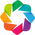

In [420]:
import holoviews.plotting.bokeh
from bokeh.plotting import show, output_file
hv.extension('bokeh')

In [421]:


app = Dash(__name__)

app.layout = html.Div([
    html.H4('Interactive color selection with simple Dash example'),
    html.P("Select color:"),
    dcc.Dropdown(
        id="dropdown",
        options=['Gold', 'MediumTurquoise', 'LightGreen'],
        value='Gold',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))
def display_color(color):
    fig = go.Figure(
        data=go.Bar(y=[2, 3, 1], # replace with your own data source
                    marker_color=color))
    return fig


app.run_server(debug=True)

<IPython.core.display.Javascript object>

##   Определения функций

Функция выполняет основные процедуры EDA, включая расчет пропусков и дубликатов

In [422]:
def about_df(df,sample_size=5):
  #print(f'Первые {sample_size} строк')
  display(df.head(sample_size))
  #print(f'Последние {sample_size} строк')
  display(df.tail(sample_size))
  #print(f'\\n Основная информация')
  print(df.info())
  display(df.describe(include='all'))
  print(f'\\n Кол-во и доля пропусков')
  display(pd.DataFrame(
      np.array([df.isna().sum(), df.isna().mean()]).T,
      columns = ['кол-во пропусков','доля пропусков'],
      index=df.columns).style.background_gradient('coolwarm'))
  print(f'\\n Кол-во и доля дубликатов')
  print(1 - df.duplicated().value_counts()/len(df) )



Функция обеспечивает генерации новых столбцов для исходной таблицы


In [423]:
def add_f(df):

    _ = df.sort_values(by=['link', 'start_date']).copy()
    _['step'] = _.groupby('link').cumcount() + 1
    _['source'] = _['team']
    _['target'] = _.groupby('link')['source'].shift(-1)

    return _.drop(['team'], axis=1)


Функция генерации индексов source

    Args:
        df (pd.DataFrame): исходная таблица с признаками step, source, target.
    Returns:
        dict: словарь с индексами, именами и соответсвиями индексов именам source.
    


In [424]:
def get_src_indx(df):
    _ = {}

    count = 0
    # получаем индексы источников
    for n, step in enumerate(df['step'].unique().tolist()):
        # получаем уникальные наименования для шага
        _[n+1] = {}
        _[n+1]['sources'] = df[df['step'] == step]['source'].unique().tolist()
        _[n+1]['players'] = df[df['step'] == step]['player'].unique().tolist()
        _[n+1]['sources_index'] = []
        for i in range(len(_[n+1]['sources'])):
            _[n+1]['sources_index'].append(count)
            count += 1

    for key in _:
        _[key]['sources_dict'] = {}
        for name, n in zip(_[key]['sources'], _[key]['sources_index']):
            _[key]['sources_dict'][name] = n
    return _


Случайная генерация цветов rgba

    Args:

    Returns:
        str: Строка со сгенерированными параметрами цвета

In [425]:
def gen_rndm_clr():
    r, g, b = np.random.randint(255, size=3)
    return f'rgba({r}, {g}, {b}, 1)'

Генерация цветов rgba

    Args:
        mode (str): сгенерировать случайные цвета, если 'random', а если 'custom' -
                    использовать заранее подготовленные
    Returns:
        dict: словарь с цветами, соответствующими каждому индексу

In [426]:
def clrs_for_srcs(m):

    clrs_dct = {}

    if m == 'random':

        for label in df_comp['source'].unique():
            r, g, b = np.random.randint(255, size=3)
            clrs_dct[label] = f'rgba({r}, {g}, {b}, 1)'

    elif m == 'custom':
        clrs = requests.get('https://raw.githubusercontent.com/rusantsovsv/senkey_tutorial/main/json/colors_senkey.json').json()
        for no, label in enumerate(df_comp['source'].unique()):
            clrs_dct[label] = clrs['custom_colors'][no]

    return clrs_dct


Расчет уникальных id в процентах (для вывода в hover text каждого узла)

    Args:
        sources (list): список с индексами source.
        targets (list): список с индексами target.
        values (list): список с "объемами" потоков.

    Returns:
        list: список с "объемами" потоков в процентах


In [427]:
def prcnt_usrs(srcs, trgts, vls):
  zip_lsts = list(zip(srcs, trgts, vls))
  new_list = []
  unique_dict = {}
  for src, trgt, val in zip_lsts:
    if src not in unique_dict:
      unique_dict[src] = 0
      for sr, tg, vl in zip_lsts:
        if sr == src:
          unique_dict[src] += vl

  for src, trgt, val in zip_lsts:
    new_list.append(round(100 * val / unique_dict[src], 1))

  return new_list

Необходимые для отрисовки диаграммы переменные списков и возвращаем
их в виде словаря
  Args:
        source_indexes (dict): словарь с именами и индексами source.
        colors (dict): словарь с цветами source.
        frac (int): ограничение на минимальный "объем" между узлами.

  Returns:
        dict: словарь со списками, необходимыми для диаграммы.


In [428]:
src_indxs = []
colors_dict = []

def lsts_for_plt(src_indxs=src_indxs, colors=colors_dict, frac=0):
    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    for step in tqdm(sorted(df_comp['step'].unique()), desc='Шаг'):
        if step + 1 not in src_indxs:
            continue
        temp_dict_source = src_indxs[step]['sources_dict']
        temp_dict_target = src_indxs[step+1]['sources_dict']
        for source, index_source in tqdm(temp_dict_source.items()):
            for target, index_target in temp_dict_target.items():
                temp_df = df_comp[(df_comp['step'] == step)&(df_comp['source'] == source)&(df_comp['target'] == target)]
                value = len(temp_df)
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    #print('Value')
                    #print('colors[source]',source)
                    #print('colors[source]',colors[source].replace(', 1)', ', 0.2)'))
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))

    labels = []
    colors_labels = []
    for key in src_indxs:
        for name in src_indxs[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])
    perc_values = prcnt_usrs(sources, targets, values)
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")
    return {'sources': sources,
            'targets': targets,
            'values': values,
            'labels': labels,
            'colors_labels': colors_labels,
            'link_color': link_color,
            'link_text': link_text}


In [429]:
def lsts_for_plt2(src_indxs, colors, frac=0):
    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    for step in tqdm(sorted(df_comp['step'].unique()), desc='Шаг'):
        if step + 1 not in src_indxs:
            continue
        temp_dict_source = src_indxs[step]['sources_dict']
        temp_dict_target = src_indxs[step+1]['sources_dict']
        for source, index_source in tqdm(temp_dict_source.items()):
            for target, index_target in temp_dict_target.items():
                temp_df = df_comp[(df_comp['step'] == step)&(df_comp['source'] == source)&(df_comp['target'] == target)]
                value = len(temp_df)
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    #print('Value')
                    #print('colors[source]',source)
                    #print('colors[source]',colors[source].replace(', 1)', ', 0.2)'))
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))

    labels = []
    colors_labels = []
    for key in src_indxs:
        for name in src_indxs[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])
    perc_values = prcnt_usrs(sources, targets, values)
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")
    return {'sources': sources,
            'targets': targets,
            'values': values,
            'labels': labels,
            'colors_labels': colors_labels,
            'link_color': link_color,
            'link_text': link_text}


Функция для генерации объекта диаграммы Сенкей

    Args:
        data_dict (dict): словарь со списками данных для построения.

    Returns:
        plotly.graph_objs._figure.Figure: объект изображения.



In [430]:
data_for_plot=[]

def plt_snk_dgrm(title, data_dict=data_for_plot, width=1400, height=700):

    fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x = [0,1],
          y = [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad=50,
          thickness=15,
          line=dict(color = "black", width = 0.1),
          label=data_dict['labels'],
          color=data_dict['colors_labels'],
          #customdata=data_dict['players'],
          hovertemplate='Всего переходов у команды %{label}: %{value}<extra></extra>'
        ),
        link = dict(
          arrowlen=15,
          source=data_dict['sources'],
          target=data_dict['targets'],
          value=data_dict['values'],
          label=data_dict['link_text'],
          color=data_dict['link_color'],
          customdata=data_dict['link_text'],
          hovertemplate='Из команды %{source.label}<br />'+
        'в команду %{target.label}<br /> перешло игроков: %{value}'+
        ', что составляет %{customdata}<br />',
      ))])
    fig.update_layout(title_text=title, font_size=10, width=width, height=height)


    return fig

In [431]:
def plt_snk_dgrm2(title, data_dict, width=1400, height=700):

    fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x = [0,1],
          y = [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad=50,
          thickness=15,
          line=dict(color = "black", width = 0.1),
          label=data_dict['labels'],
          color=data_dict['colors_labels'],
          #customdata=data_dict['players'],
          hovertemplate='Всего переходов у команды %{label}: %{value}<extra></extra>'
        ),
        link = dict(
          arrowlen=15,
          source=data_dict['sources'],
          target=data_dict['targets'],
          value=data_dict['values'],
          label=data_dict['link_text'],
          color=data_dict['link_color'],
          customdata=data_dict['link_text'],
          hovertemplate='Из команды %{source.label}<br />'+
        'в команду %{target.label}<br /> перешло игроков: %{value}'+
        ', что составляет %{customdata}<br />',
      ))])
    fig.update_layout(title_text=title, font_size=10, width=width, height=height)


    return fig

Функция генерации сэмплов графа

In [432]:
top_list=250
merged_pl = pd.DataFrame()
top_ids = pd.DataFrame()
G = nx.Graph()
def graph_info(top_list=top_list, merged_pl=merged_pl, top_ids=top_ids, G=G):
#if 1>0:
  merged_pl['flag']==1
  top_id = merged_pl[merged_pl['flag']==1].groupby(['link_x'])['link_y'].nunique().sort_values(ascending=False)[:int(top_list)].index.to_list()
  top_ids = play_together_names.query('link_x in @top_id')
  G_sample = G.subgraph(set(top_ids['player_x']))
  #G_sample.add_nodes_from(list(set(top_ids['player_x'])))
  return G_sample

In [433]:
def graph_info2(top_list, merged_pl, top_ids, G):
#if 1>0:
  merged_pl['flag']==1
  top_id = merged_pl[merged_pl['flag']==1].groupby(['link_x'])['link_y'].nunique().sort_values(ascending=False)[:int(top_list)].index.to_list()
  top_ids = play_together_names.query('link_x in @top_id')
  G_sample = G.subgraph(set(top_ids['player_x']))
  #G_sample.add_nodes_from(list(set(top_ids['player_x'])))
  return G_sample

In [434]:
type(top_list)

int

## Загрузка датасетов

In [435]:
players = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/e/2PACX-1vT3TtrPT83dPIbAEtp5tjhpHmllTxYjFhJ62lThCeI9yPMeYwMCHPq9J5uoAL-Zcx3HvxMlXEeEl8iT/pub?output=csv',parse_dates=['start_date','end_date'], dayfirst=True)

In [436]:
stat_new = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT411kwpQk6lUrapB4bnsC1--cUkQMxWieItZ0sfIoYdmsO50Lu_hWws-r_UBfaww/pub?output=csv')

In [437]:
players_data = pd.read_csv('https://raw.githubusercontent.com/CurasaoRG/hockey_project/main/players_data.csv')

In [438]:
players_personal_data = pd.read_csv\
('https://raw.githubusercontent.com/CurasaoRG/hockey_project/main/players_personal_data.csv', parse_dates=['Date_of_Birth'], \
 dayfirst=False)

In [439]:
transfers = pd.read_csv(\
                        'https://raw.githubusercontent.com/CurasaoRG/hockey_project/main/transfers.csv', \
                        parse_dates=['Date'], dayfirst=True)

In [440]:
players_stats = pd.read_csv(\
                            'https://raw.githubusercontent.com/CurasaoRG/hockey_project/main/players_stats.csv', \
                            parse_dates=['Season'], dayfirst=False , index_col=0)

## EDA с применением about_df

Так как не все в команде капитаны, в столбце Captain, есть пропуски.
Столбцы - Birthplace, Age обработаем отдельно.  

In [441]:
players_data.columns = players_data.columns.str.lower()

In [442]:
about_df(players_data)

,team,season,player,player_number,position,captain,born,birthplace,age,height,weight,stick,player_link
0,Salavat Yulaev Ufa,2008-2009,Sergei Belov,31,G,NaN,1982,"St. Petersburg, RUS",40.0,180,78,L,https://www.eliteprospects.com/player/19555/se...
1,Salavat Yulaev Ufa,2008-2009,Rafael Khakimov,31,G,NaN,1990,"Ufa, RUS",33.0,180,78,L,https://www.eliteprospects.com/player/47547/ra...
2,Salavat Yulaev Ufa,2008-2009,Vadim Tarasov,1,G,NaN,1976,"Ust-Kamenogorsk, KAZ",46.0,183,84,L,https://www.eliteprospects.com/player/11990/va...
3,Salavat Yulaev Ufa,2008-2009,Alexander Yeryomenko,30,G,NaN,1980,"Moskva, RUS",43.0,180,78,L,https://www.eliteprospects.com/player/12286/al...
4,Salavat Yulaev Ufa,2008-2009,Miroslav Blatak,23,D,NaN,1982,"Zlin, CZE",41.0,180,78,L,https://www.eliteprospects.com/player/8421/mir...


,team,season,player,player_number,position,captain,born,birthplace,age,height,weight,stick,player_link
14327,HK Sochi,2022-2023,Nikita Tochitsky,33,C,“C,1991,"St. Petersburg, RUS",31.0,190,86,L,https://www.eliteprospects.com/player/75331/ni...
14328,HK Sochi,2022-2023,Artur Tyanulin,13,RW,NaN,1997,"Kazan, RUS",26.0,175,83,R,https://www.eliteprospects.com/player/266824/a...
14329,HK Sochi,2022-2023,Dmitri Utkin,15,C,NaN,2002,"Solnechnogorsk, RUS",20.0,189,82,L,https://www.eliteprospects.com/player/561884/d...
14330,HK Sochi,2022-2023,Tigran Yarulin,18,F,NaN,2003,"Vladivostok, RUS",20.0,189,92,L,https://www.eliteprospects.com/player/652831/t...
14331,HK Sochi,2022-2023,Dmitri Zavgorodny,92,LW,NaN,2000,"Omsk, RUS",22.0,175,78,R,https://www.eliteprospects.com/player/396918/d...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14332 entries, 0 to 14331
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           14332 non-null  object 
 1   season         14332 non-null  object 
 2   player         14332 non-null  object 
 3   player_number  14332 non-null  int64  
 4   position       14332 non-null  object 
 5   captain        1037 non-null   object 
 6   born           14332 non-null  int64  
 7   birthplace     14271 non-null  object 
 8   age            14234 non-null  float64
 9   height         14332 non-null  int64  
 10  weight         14332 non-null  int64  
 11  stick          14332 non-null  object 
 12  player_link    14332 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.4+ MB
None


,team,season,player,player_number,position,captain,born,birthplace,age,height,weight,stick,player_link
count,14332,14332,14332,14332.000000,14332,1037,14332.000000,14271,14234.000000,14332.000000,14332.000000,14332,14332
unique,40,15,3561,NaN,26,2,NaN,840,NaN,NaN,NaN,3,3599
top,Neftekhimik Nizhnekamsk,2016-2017,Vladimir Tkachyov,NaN,D,“A,NaN,"Moskva, RUS",NaN,NaN,NaN,L,https://www.eliteprospects.com/player/19079/ye...
freq,605,1133,21,NaN,4596,677,NaN,1750,NaN,NaN,NaN,10950,19
mean,NaN,NaN,NaN,42.584636,NaN,NaN,1988.930156,NaN,33.545455,184.246232,89.025188,NaN,NaN
std,NaN,NaN,NaN,29.250105,NaN,NaN,6.500345,NaN,6.506822,5.547821,7.705267,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,1958.000000,NaN,17.000000,167.000000,61.000000,NaN,NaN
25%,NaN,NaN,NaN,17.000000,NaN,NaN,1985.000000,NaN,29.000000,180.000000,84.000000,NaN,NaN
50%,NaN,NaN,NaN,36.000000,NaN,NaN,1989.000000,NaN,33.000000,184.000000,89.000000,NaN,NaN
75%,NaN,NaN,NaN,70.000000,NaN,NaN,1994.000000,NaN,38.000000,188.000000,94.000000,NaN,NaN


\n Кол-во и доля пропусков


,кол-во пропусков,доля пропусков
team,0.000000,0.000000
season,0.000000,0.000000
player,0.000000,0.000000
player_number,0.000000,0.000000
position,0.000000,0.000000
captain,13295.000000,0.927644
born,0.000000,0.000000
birthplace,61.000000,0.004256
age,98.000000,0.006838
height,0.000000,0.000000


\n Кол-во и доля дубликатов
False    0.0
dtype: float64


In [443]:
players_personal_data.columns = players_personal_data.columns.str.lower()
about_df(players_personal_data)

,player_name,date_of_birth,position,age,place_of_birth,nation,grip,youth_team,height_cm,height_ft,weight_kg,weight_lbs,awards,player_link
0,Sergei Belov,1982-09-27,G,40,"St. Petersburg, RUS",Russia,L,SKA St. Petersburg,180,"5'11""",78,172 lbs,"{""2009-2010"": [""Russia2 Silver Medal""], ""2013-...",https://www.eliteprospects.com/player/19555/se...
1,Rafael Khakimov,1990-04-06,G,33,"Ufa, RUS",Russia,L,Salavat Yulaev Ufa,180,"5'11""",78,172 lbs,"{""2010-2011"": [""MHL All-Star Game"", ""MHL Best ...",https://www.eliteprospects.com/player/47547/ra...
2,Vadim Tarasov,1976-12-31,G,46,"Ust-Kamenogorsk, KAZ",Russia\n \n / \n Kaza...,L,Torpedo Ust-Kamenogorsk,183,"6'0""",84,185 lbs,"{""1998-1999"": [""RSL Best Goaltender""], ""1999-2...",https://www.eliteprospects.com/player/11990/va...
3,Alexander Yeryomenko,1980-04-10,G,43,"Moskva, RUS",Russia,L,Dynamo Moskva,180,"5'11""",78,172 lbs,"{""2004-2005"": [""RSL Champion"", ""World Champion...",https://www.eliteprospects.com/player/12286/al...
4,Miroslav Blatak,1982-05-25,D,41,"Zlin, CZE",Czechia,L,HC Zlin,180,"5'11""",78,172 lbs,"{""2001-2002"": [""Czech Extraliga Bronze Medal"",...",https://www.eliteprospects.com/player/8421/mir...


,player_name,date_of_birth,position,age,place_of_birth,nation,grip,youth_team,height_cm,height_ft,weight_kg,weight_lbs,awards,player_link
3594,Yegor Sobolevsky,2002-04-07,D,21,"St. Petersburg, RUS",Russia,R,Neva St. Petersburg,180,"5'11""",78,172 lbs,"{""2021-2022"": [""MHL Champion""]}",https://www.eliteprospects.com/player/595716/y...
3595,Roman Yuzbashyan,2002-07-13,D/C,20,"Lipetsk, RUS",Russia,L,HK Lipetsk,184,"6'0""",87,192 lbs,{},https://www.eliteprospects.com/player/649445/r...
3596,Sergei Popov,2000-03-27,LW/RW,23,"Korolyov, RUS",Russia,L,-,180,"5'11""",83,183 lbs,"{""2022-2023"": [""KHL Forward of the Week (Jan....",https://www.eliteprospects.com/player/418542/s...
3597,Dmitri Utkin,2002-09-18,C,20,"Solnechnogorsk, RUS",Russia,L,Dynamo Moskva,189,"6'2""",82,181 lbs,"{""2018-2019"": [""ECEL 16U Champion""], ""2021-202...",https://www.eliteprospects.com/player/561884/d...
3598,Tigran Yarulin,2003-05-09,F,20,"Vladivostok, RUS",Russia,L,Traktor Chelyabinsk,189,"6'2""",92,203 lbs,{},https://www.eliteprospects.com/player/652831/t...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   player_name     3599 non-null   object        
 1   date_of_birth   3599 non-null   datetime64[ns]
 2   position        3599 non-null   object        
 3   age             3599 non-null   object        
 4   place_of_birth  3599 non-null   object        
 5   nation          3599 non-null   object        
 6   grip            3599 non-null   object        
 7   youth_team      3599 non-null   object        
 8   height_cm       3599 non-null   int64         
 9   height_ft       3599 non-null   object        
 10  weight_kg       3599 non-null   int64         
 11  weight_lbs      3599 non-null   object        
 12  awards          3599 non-null   object        
 13  player_link     3599 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage:

<ipython-input-422-9cf0e6e2a9bb>:8: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,player_name,date_of_birth,position,age,place_of_birth,nation,grip,youth_team,height_cm,height_ft,weight_kg,weight_lbs,awards,player_link
count,3599,3599,3599,3599,3599,3599,3599,3599,3599.000000,3599,3599.000000,3599,3599,3599
unique,3561,2970,26,42,841,119,3,630,NaN,16,NaN,54,2857,3599
top,Dmitri Vorobyov,1990-01-31 00:00:00,D,32,"Moskva, RUS",Russia,L,-,NaN,"6'0""",NaN,194 lbs,{},https://www.eliteprospects.com/player/19555/se...
freq,3,4,1111,197,360,1923,2695,522,NaN,748,NaN,213,585,1
first,NaN,1958-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2005-06-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.195610,NaN,87.749931,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.556879,NaN,7.853313,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.000000,NaN,61.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,NaN,82.000000,NaN,NaN,NaN


\n Кол-во и доля пропусков


,кол-во пропусков,доля пропусков
player_name,0.000000,0.000000
date_of_birth,0.000000,0.000000
position,0.000000,0.000000
age,0.000000,0.000000
place_of_birth,0.000000,0.000000
nation,0.000000,0.000000
grip,0.000000,0.000000
youth_team,0.000000,0.000000
height_cm,0.000000,0.000000
height_ft,0.000000,0.000000


\n Кол-во и доля дубликатов
False    0.0
dtype: float64


In [444]:
transfers.columns = transfers.columns.str.lower()

about_df(transfers)

,date,player,player_link,from_team,from_team_link,to_team,to_team_link
0,2023-06-05,Stefan Warg,https://www.eliteprospects.com/player/6870/ste...,HC Sparta Praha,https://www.eliteprospects.com/team/164/hc-spa...,Unknown,NaN
1,2023-06-05,Patrik Romancik,https://www.eliteprospects.com/player/102395/p...,Vlci Zilina,https://www.eliteprospects.com/team/1162/vlci-...,VHK Vsetín,https://www.eliteprospects.com/team/5337/vhk-v...
2,2023-06-05,Paul Stanley,https://www.eliteprospects.com/player/119679/p...,Solihull Barons,https://www.eliteprospects.com/team/1525/solih...,Retired,NaN
3,2023-06-05,Marcus Maynard,https://www.eliteprospects.com/player/122841/m...,Solihull Barons,https://www.eliteprospects.com/team/1525/solih...,Retired,NaN
4,2023-06-05,Sam Hewitt,https://www.eliteprospects.com/player/156284/s...,Solihull Barons,https://www.eliteprospects.com/team/1525/solih...,Retired,NaN


,date,player,player_link,from_team,from_team_link,to_team,to_team_link
167120,2007-12-29,Jason Doig,https://www.eliteprospects.com/player/15347/ja...,EHC Basel,https://www.eliteprospects.com/team/258/ehc-basel,Stavanger Oilers,https://www.eliteprospects.com/team/845/stavan...
167121,2007-12-21,Stanislav Hudec,https://www.eliteprospects.com/player/13966/st...,Vityaz Chekhov,https://www.eliteprospects.com/team/201/vityaz...,EHC Basel,https://www.eliteprospects.com/team/258/ehc-basel
167122,2007-12-15,T.J. Guidarelli,https://www.eliteprospects.com/player/15132/t....,Amiens,https://www.eliteprospects.com/team/211/amiens,EHC Olten,https://www.eliteprospects.com/team/264/ehc-olten
167123,2007-12-14,Vadim Slivchenko,https://www.eliteprospects.com/player/1663/vad...,Eispiraten Crimmitschau,https://www.eliteprospects.com/team/659/eispir...,Wheeling Nailers,https://www.eliteprospects.com/team/256/wheeli...
167124,2007-12-14,Sylvain Dufresne,https://www.eliteprospects.com/player/11578/sy...,Odessa Jackalopes,https://www.eliteprospects.com/team/678/odessa...,Herning Blue Fox,https://www.eliteprospects.com/team/138/hernin...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167125 entries, 0 to 167124
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            167125 non-null  datetime64[ns]
 1   player          167125 non-null  object        
 2   player_link     167125 non-null  object        
 3   from_team       167125 non-null  object        
 4   from_team_link  158148 non-null  object        
 5   to_team         167125 non-null  object        
 6   to_team_link    156866 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 8.9+ MB
None


<ipython-input-422-9cf0e6e2a9bb>:8: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,date,player,player_link,from_team,from_team_link,to_team,to_team_link
count,167125,167125,167125,167125,158148,167125,156866
unique,5447,66630,68114,7421,7583,4213,4302
top,2022-08-15 00:00:00,Alexander Johansson,https://www.eliteprospects.com/player/54887/ja...,No team,https://www.eliteprospects.com/team/836/wichit...,Unknown,https://www.eliteprospects.com/team/252/south-...
freq,222,31,27,8815,303,5524,414
first,1986-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-06-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


\n Кол-во и доля пропусков


,кол-во пропусков,доля пропусков
date,0.000000,0.000000
player,0.000000,0.000000
player_link,0.000000,0.000000
from_team,0.000000,0.000000
from_team_link,8977.000000,0.053714
to_team,0.000000,0.000000
to_team_link,10259.000000,0.061385


\n Кол-во и доля дубликатов
False    0.000042
True     0.999958
dtype: float64


Строк 167125. Пропуски в столбцах From_team_link,

In [445]:
transfers.head(2)

,date,player,player_link,from_team,from_team_link,to_team,to_team_link
0,2023-06-05,Stefan Warg,https://www.eliteprospects.com/player/6870/ste...,HC Sparta Praha,https://www.eliteprospects.com/team/164/hc-spa...,Unknown,NaN
1,2023-06-05,Patrik Romancik,https://www.eliteprospects.com/player/102395/p...,Vlci Zilina,https://www.eliteprospects.com/team/1162/vlci-...,VHK Vsetín,https://www.eliteprospects.com/team/5337/vhk-v...


In [446]:
transfers['to_team'].unique()

array(['Unknown', 'VHK Vsetín', 'Retired', ..., 'Totempo HVIK',
       'EHC Wolfsburg', 'Nordsjælland Cobras'], dtype=object)

In [447]:
transfers['from_team'].value_counts()

No team                        8815
Wichita Thunder                 303
Toronto Maple Leafs             301
Neftekhimik Nizhnekamsk         296
Spartak Moskva                  295
                               ... 
Regina Vics U18 AA                1
Red Eagles 's-Hertogenbosch       1
Pikes Young Lions U15             1
EKZ Juniors U18                   1
Osseo-Maple Grove Bantam AA       1
Name: from_team, Length: 7421, dtype: int64

In [448]:
players_stats.columns = players_stats.columns.str.lower()
about_df(players_stats)

,player_name,season,team,league,player_link,regular_games_played,regular_goals,regular_assists,regular_total_points,regular_penalty_minutes,...,postseason_penalty_minutes,postseason_plus_minus,postseason_games_dressed,postseason_gaa,postseason_saves_percentage,postseason_goals_against,postseason_saves,postseason_shutouts,postseason_wlt,postseason_toi
0,Sergei Belov,2000-01,SKASt.Petersburg,Russia,https://www.eliteprospects.com/player/19555/se...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sergei Belov,2000-01,SKASt.Petersburg-2,Russia3,https://www.eliteprospects.com/player/19555/se...,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sergei Belov,2001-02,SKASt.Petersburg,Russia,https://www.eliteprospects.com/player/19555/se...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sergei Belov,2001-02,SKASt.Petersburg-2,Russia3,https://www.eliteprospects.com/player/19555/se...,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sergei Belov,2001-02,SpartakSt.Petersburg,Russia2,https://www.eliteprospects.com/player/19555/se...,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,player_name,season,team,league,player_link,regular_games_played,regular_goals,regular_assists,regular_total_points,regular_penalty_minutes,...,postseason_penalty_minutes,postseason_plus_minus,postseason_games_dressed,postseason_gaa,postseason_saves_percentage,postseason_goals_against,postseason_saves,postseason_shutouts,postseason_wlt,postseason_toi
116911,Tigran Yarulin,2016-17,TeamUralsU14,DistrictsCupU14,https://www.eliteprospects.com/player/652831/t...,6.0,1.0,2.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116912,Tigran Yarulin,2017-18,TraktorChelyabinskU16,RussiaU16Finals,https://www.eliteprospects.com/player/652831/t...,6.0,4.0,6.0,10.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116913,Tigran Yarulin,2017-18,TeamUralsU15\n“A”,DistrictsCupU15,https://www.eliteprospects.com/player/652831/t...,6.0,5.0,7.0,12.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116914,Tigran Yarulin,2018-19,TeamUralsU16\n“A”,DistrictsCupU16,https://www.eliteprospects.com/player/652831/t...,8.0,8.0,3.0,11.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116915,Tigran Yarulin,2018-19,TraktorChelyabinskU17,RussiaU17Finals,https://www.eliteprospects.com/player/652831/t...,6.0,2.0,4.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 116669 entries, 0 to 116915
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   player_name                  116669 non-null  object 
 1   season                       116669 non-null  object 
 2   team                         116669 non-null  object 
 3   league                       116384 non-null  object 
 4   player_link                  116669 non-null  object 
 5   regular_games_played         112832 non-null  float64
 6   regular_goals                99535 non-null   float64
 7   regular_assists              99475 non-null   float64
 8   regular_total_points         99474 non-null   float64
 9   regular_penalty_minutes      98700 non-null   float64
 10  regular_plus_minus           75753 non-null   float64
 11  regular_games_dressed        5959 non-null    float64
 12  regular_gaa                  11179 non-null   float64
 13 

,player_name,season,team,league,player_link,regular_games_played,regular_goals,regular_assists,regular_total_points,regular_penalty_minutes,...,postseason_penalty_minutes,postseason_plus_minus,postseason_games_dressed,postseason_gaa,postseason_saves_percentage,postseason_goals_against,postseason_saves,postseason_shutouts,postseason_wlt,postseason_toi
count,116669,116669,116669,116384,116669,112832.000000,99535.000000,99475.000000,99474.000000,98700.000000,...,30851.00000,27145.000000,1834.000000,3375.000000,3048.000000,2658.000000,2412.000000,2571.000000,2486,2671.000000
unique,3561,67,5087,676,3599,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN
top,Mikko Lehtonen,2016-17,Russia,KHL,https://www.eliteprospects.com/player/8627/jar...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-1-0,NaN
freq,116,6369,1907,14944,92,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244,NaN
mean,NaN,NaN,NaN,NaN,NaN,21.468404,4.550269,6.752993,11.303758,17.626363,...,6.34041,0.312323,7.497819,3.005313,0.904539,13.569225,153.344942,0.502139,NaN,334.912767
std,NaN,NaN,NaN,NaN,NaN,19.956762,6.747606,9.175241,15.165137,24.744786,...,8.85771,3.365736,5.103110,4.215097,0.179170,10.973910,137.152754,0.926635,NaN,301.667169
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,1.000000,1.000000,2.000000,...,0.00000,-2.000000,4.000000,1.990000,0.890000,5.000000,50.000000,0.000000,NaN,117.000000
50%,NaN,NaN,NaN,NaN,NaN,13.000000,2.000000,3.000000,5.000000,8.000000,...,4.00000,0.000000,6.000000,2.530000,0.915000,11.000000,113.000000,0.000000,NaN,241.000000
75%,NaN,NaN,NaN,NaN,NaN,38.000000,6.000000,9.000000,16.000000,24.000000,...,8.00000,2.000000,10.000000,3.380000,0.932000,19.000000,216.000000,1.000000,NaN,474.500000


\n Кол-во и доля пропусков


,кол-во пропусков,доля пропусков
player_name,0.000000,0.000000
season,0.000000,0.000000
team,0.000000,0.000000
league,285.000000,0.002443
player_link,0.000000,0.000000
regular_games_played,3837.000000,0.032888
regular_goals,17134.000000,0.146860
regular_assists,17194.000000,0.147374
regular_total_points,17195.000000,0.147383
regular_penalty_minutes,17969.000000,0.154017


\n Кол-во и доля дубликатов
False    0.0
dtype: float64


*Строк* 116669. Все красное! Но этот датасет больше для информации

In [449]:
players_stats.head(2)

,player_name,season,team,league,player_link,regular_games_played,regular_goals,regular_assists,regular_total_points,regular_penalty_minutes,...,postseason_penalty_minutes,postseason_plus_minus,postseason_games_dressed,postseason_gaa,postseason_saves_percentage,postseason_goals_against,postseason_saves,postseason_shutouts,postseason_wlt,postseason_toi
0,Sergei Belov,2000-01,SKASt.Petersburg,Russia,https://www.eliteprospects.com/player/19555/se...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sergei Belov,2000-01,SKASt.Petersburg-2,Russia3,https://www.eliteprospects.com/player/19555/se...,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [450]:
about_df(players)

,player_link,player,team,start_date,end_date
0,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Jokerit,2014-09-04,2016-03-02
1,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Metallurg Mg,2010-09-09,2012-03-22
2,https://en.khl.ru/players/17585/?idplayer=1758...,Miro Aaltonen,Vityaz,2021-09-02,2022-01-11
3,https://en.khl.ru/players/17585/?idplayer=1758...,Miro Aaltonen,SKA,2019-12-17,2021-02-27
4,https://en.khl.ru/players/17585/?idplayer=1758...,Miro Aaltonen,Vityaz,2016-08-27,2019-12-09


,player_link,player,team,start_date,end_date
8174,https://en.khl.ru/players/13961/?idplayer=1396...,Dmitry Zyuzin,Metallurg Nk,2010-10-14,2011-02-16
8175,https://en.khl.ru/players/13961/?idplayer=1396...,Dmitry Zyuzin,Salavat Yulaev,2008-10-27,2008-10-27
8176,https://en.khl.ru/players/15734/?idplayer=1573...,Maxim Zyuzyakin,Lada,2014-09-08,2014-09-27
8177,https://en.khl.ru/players/15734/?idplayer=1573...,Maxim Zyuzyakin,Metallurg Nk,2013-09-05,2013-10-03
8178,https://en.khl.ru/players/15734/?idplayer=1573...,Maxim Zyuzyakin,Lokomotiv,2010-03-05,2011-01-04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   player_link  8179 non-null   object        
 1   player       8179 non-null   object        
 2   team         8179 non-null   object        
 3   start_date   8179 non-null   datetime64[ns]
 4   end_date     8179 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 319.6+ KB
None


<ipython-input-422-9cf0e6e2a9bb>:8: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

<ipython-input-422-9cf0e6e2a9bb>:8: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,player_link,player,team,start_date,end_date
count,8179,8179,8179,8179,8179
unique,3720,3712,38,1525,1894
top,https://en.khl.ru/players/13679/?idplayer=1367...,Mikhail Zhukov,Spartak,2008-09-03 00:00:00,2015-02-24 00:00:00
freq,14,14,370,297,135
first,NaN,NaN,NaN,2008-09-02 00:00:00,2008-09-03 00:00:00
last,NaN,NaN,NaN,2023-02-26 00:00:00,2023-04-29 00:00:00


\n Кол-во и доля пропусков


,кол-во пропусков,доля пропусков
player_link,0.000000,0.000000
player,0.000000,0.000000
team,0.000000,0.000000
start_date,0.000000,0.000000
end_date,0.000000,0.000000


\n Кол-во и доля дубликатов
False    0.0
dtype: float64


8179 строк. Пропусков нет

In [451]:
about_df(stat_new)

,player_link,player,position,born,age,country,hight,weight,shoot,GP,...,FOA,TkA,W,L,SOP,GA,Sv,%Sv,GAA,SO
0,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,forward,4-июн.-85,38,Finland,184,89,right,245,...,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://en.khl.ru/players/17585/?idplayer=1758...,Miro Aaltonen,forward,7-июн.-93,30,Finland,177,84,left,256,...,60.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.khl.ru/players/13041/?idplayer=1304...,Ruslan Abdrakhmanov,forward,25-дек.-84,38,Russia,178,77,left,10,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.khl.ru/players/38736/?idplayer=3873...,Jindrich Abdul,forward,1-февр.-96,27,Czechia,185,85,left,12,...,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.khl.ru/players/24998/?idplayer=2499...,Ilnur Abdulkhakov,goaltender,15-янв.-99,24,Russia,187,84,left,0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-,-,0.0


,player_link,player,position,born,age,country,hight,weight,shoot,GP,...,FOA,TkA,W,L,SOP,GA,Sv,%Sv,GAA,SO
3712,https://en.khl.ru/players/19061/?idplayer=1906...,Viktor Zakharov,forward,8-янв.-94,29,Ukraine,194,85,left,37,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3713,https://en.khl.ru/players/16028/?idplayer=1602...,Ignat Zemchenko,forward,24-апр.-92,31,Russia,189,97,left,253,...,45.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3714,https://en.khl.ru/players/15765/?idplayer=1576...,Stepan Zhdanov,forward,25-авг.-89,33,Russia,170,76,right,13,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3715,https://en.khl.ru/players/16593/?idplayer=1659...,Nikolai Zhilin,defense,23-мая-92,31,Russia,187,88,left,10,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3716,https://en.khl.ru/players/40564/?idplayer=4056...,Nikita A. Zimin,forward,5-июн.-03,20,Russia,188,81,left,1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_link  3717 non-null   object 
 1   player       3717 non-null   object 
 2   position     3717 non-null   object 
 3   born         3717 non-null   object 
 4   age          3717 non-null   object 
 5   country      3717 non-null   object 
 6   hight        3717 non-null   int64  
 7   weight       3717 non-null   int64  
 8   shoot        3717 non-null   object 
 9   GP           3717 non-null   int64  
 10  G            3717 non-null   int64  
 11  Assists      3717 non-null   int64  
 12  PTS          3226 non-null   float64
 13  +/-          3226 non-null   float64
 14  +            3226 non-null   float64
 15  -            3226 non-null   float64
 16  PIM          3717 non-null   int64  
 17  ESG          3226 non-null   float64
 18  PPG          3226 non-null   float64
 19  SHG   

,player_link,player,position,born,age,country,hight,weight,shoot,GP,...,FOA,TkA,W,L,SOP,GA,Sv,%Sv,GAA,SO
count,3717,3717,3717,3717,3717,3717,3717.000000,3717.000000,3717,3717.000000,...,3226.000000,3226.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491,491,491.000000
unique,3717,3709,3,3062,64,27,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,190,NaN
top,https://en.khl.ru/players/16785/?idplayer=1678...,Alexandre Picard,forward,31-янв.-90,32,Russia,NaN,NaN,left,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,NaN
freq,1,2,2061,4,200,2202,NaN,NaN,2801,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,139,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,183.976594,86.930051,NaN,130.128329,...,13.688779,2.624923,21.716904,21.708758,5.529532,119.091650,1314.653768,NaN,NaN,4.187373
std,NaN,NaN,NaN,NaN,NaN,NaN,5.640727,8.248655,NaN,167.232536,...,24.705305,7.033214,43.380981,36.473232,10.416855,200.864757,2364.312402,NaN,NaN,9.373950
min,NaN,NaN,NaN,NaN,NaN,NaN,160.000000,42.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,82.000000,NaN,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,184.000000,87.000000,NaN,55.000000,...,2.000000,0.000000,2.000000,5.000000,1.000000,27.000000,214.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,188.000000,92.000000,NaN,183.000000,...,17.000000,0.000000,23.000000,26.000000,6.500000,147.000000,1434.500000,NaN,NaN,4.000000


\n Кол-во и доля пропусков


,кол-во пропусков,доля пропусков
player_link,0.000000,0.000000
player,0.000000,0.000000
position,0.000000,0.000000
born,0.000000,0.000000
age,0.000000,0.000000
country,0.000000,0.000000
hight,0.000000,0.000000
weight,0.000000,0.000000
shoot,0.000000,0.000000
GP,0.000000,0.000000


\n Кол-во и доля дубликатов
False    0.0
dtype: float64


3717 строк. Есть пропуски. Информация не внесена, если для амплуа игрока она не предусмотрена

## Дополнительный EDA

В этом разделе добавим новый столбец link с id игрока, извлеченного из 'player_link', во всех датасетах.

In [452]:
players_data['link'] = players_data['player_link'].str.extract(r'/(\d+)/')

In [453]:
players_data.head(1)

,team,season,player,player_number,position,captain,born,birthplace,age,height,weight,stick,player_link,link
0,Salavat Yulaev Ufa,2008-2009,Sergei Belov,31,G,NaN,1982,"St. Petersburg, RUS",40.0,180,78,L,https://www.eliteprospects.com/player/19555/se...,19555


In [454]:
ohne_age = players_data[(players_data['age'].isna())]['player'].to_list()

In [455]:
players_personal_data['link'] = players_personal_data['player_link'].str.extract(r'/(\d+)/')

In [456]:
players_personal_data.head(1)

,player_name,date_of_birth,position,age,place_of_birth,nation,grip,youth_team,height_cm,height_ft,weight_kg,weight_lbs,awards,player_link,link
0,Sergei Belov,1982-09-27,G,40,"St. Petersburg, RUS",Russia,L,SKA St. Petersburg,180,"5'11""",78,172 lbs,"{""2009-2010"": [""Russia2 Silver Medal""], ""2013-...",https://www.eliteprospects.com/player/19555/se...,19555


Для дальнейшей обработки поменяем тип данных в столбце age.

In [457]:
players_personal_data['age'].unique()


array(['40', '33', '46', '43', '41', '44', '34', '48', '38', '42', '47',
       '36', '37', '45', '39', '32', '50', '35', '51', '49', '31', '52',
       'Deceased', '53', '30', '54', '59', '65', '58', '29', '28', '27',
       '26', '25', '24', '23', '22', '21', '20', '19', '18', '17'],
      dtype=object)

In [458]:
players_personal_data.loc[players_personal_data['age'] == 'Deceased']  = np.NaN

In [459]:
players_personal_data['age'].unique()

array(['40', '33', '46', '43', '41', '44', '34', '48', '38', '42', '47',
       '36', '37', '45', '39', '32', '50', '35', '51', '49', '31', '52',
       nan, '53', '30', '54', '59', '65', '58', '29', '28', '27', '26',
       '25', '24', '23', '22', '21', '20', '19', '18', '17'], dtype=object)

In [460]:
players_personal_data.query('player_name == @ohne_age').head()

,player_name,date_of_birth,position,age,place_of_birth,nation,grip,youth_team,height_cm,height_ft,weight_kg,weight_lbs,awards,player_link,link


In [461]:
transfers['link'] = transfers['player_link'].str.extract(r'/(\d+)/')

In [462]:
transfers.head(1)

,date,player,player_link,from_team,from_team_link,to_team,to_team_link,link
0,2023-06-05,Stefan Warg,https://www.eliteprospects.com/player/6870/ste...,HC Sparta Praha,https://www.eliteprospects.com/team/164/hc-spa...,Unknown,NaN,6870


Типы скоректированы

In [463]:
players_stats['link'] = players_stats['player_link'].str.extract(r'/(\d+)/')

In [464]:
players_stats.head(1)

,player_name,season,team,league,player_link,regular_games_played,regular_goals,regular_assists,regular_total_points,regular_penalty_minutes,...,postseason_plus_minus,postseason_games_dressed,postseason_gaa,postseason_saves_percentage,postseason_goals_against,postseason_saves,postseason_shutouts,postseason_wlt,postseason_toi,link
0,Sergei Belov,2000-01,SKASt.Petersburg,Russia,https://www.eliteprospects.com/player/19555/se...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19555


In [465]:
len(players['player'].unique())

3712

In [466]:
players.columns = players.columns.str.lower()
players['link'] = players['player_link'].str.extract(r'/(\d+)/')
players.head(1)

,player_link,player,team,start_date,end_date,link
0,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Jokerit,2014-09-04,2016-03-02,16785


In [467]:
len(players['link'].unique())

3720

Получили на 8 игроков больше, в данных есть тезки.

In [468]:
len(stat_new['player'].unique())

3709

In [469]:
stat_new['link'] = stat_new['player_link'].str.extract(r'/(\d+)/')
stat_new.head(1)

,player_link,player,position,born,age,country,hight,weight,shoot,GP,...,TkA,W,L,SOP,GA,Sv,%Sv,GAA,SO,link
0,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,forward,4-июн.-85,38,Finland,184,89,right,245,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16785


In [470]:
len(stat_new['link'].unique())

3717

In [471]:
uniq = stat_new['link'].unique()
players.query('link not in @uniq')

,player_link,player,team,start_date,end_date,link
4591,https://en.khl.ru/players/16439/?idplayer=1643...,Adam Munro,Sibir,2010-01-16,2010-03-07,16439
4848,https://en.khl.ru/players/15624/?idplayer=1562...,Alexander Novikov,Vityaz,2009-01-27,2009-02-26,15624
6415,https://en.khl.ru/players/15246/?idplayer=1524...,Igor Shvedov,Dinamo Mn,2009-01-27,2009-02-26,15246


In [472]:
stat_new.loc[(stat_new['player']== 'Adam Munro')]

,player_link,player,position,born,age,country,hight,weight,shoot,GP,...,TkA,W,L,SOP,GA,Sv,%Sv,GAA,SO,link


Для 3 игроков данных в players (о переходах) нет

### Проверка данных на наличие дубликатов - выполена в отчете функции about_df

In [473]:
transfers.duplicated().sum() #найдем явные дубликаты

7

Удалим явные дубликаты:

In [474]:
transfers = transfers.drop_duplicates()

In [475]:
transfers.duplicated().sum()

0

Явных дубликатов нет.

## Анализ данных

В совокупности, наша база представляет собой граф, каждая вершина которой - это игрок, который описывается множеством различных переменных - год рождения, ФИО (для большинства :) рост, год начала карьеры и окончания ... это константы
<p> Дополнительно добавляется размерность год сезона (или если допускаются меньшие промежутки, то месяц/квартал)
<p> Вес, клуб, игровая роль сезона, очки в году, броски, удаления и т.д. для каждого игрока меняются от сезона к сезону. Т.е. игрок представлен в этом графе количеством точек по количеству сезонов.
<p> Для достижения главной цели исследования, определения коэффициента социальных связей, мы в некоторых случаях упрощаем наш граф. Например - переменную клуб/сезон мы описываем просто как словарь -
<p>{2017: 'ЦСКА', 2018: 'Динамо', 2019: 'Авангард', 2020: 'Ванкувер', 2021: 'Травма', 2022: 'Динамо'}

Одно из упрощений Sankey Chart.
Мы заменяем два измерения - сезон  и команду одной переменной - команда, но сохраненяем направление графа (Из ЦСКА в Динамо, из Динамо в Авангард.
Дополнительно создаем связь - в Динамо-1 первый раз, играл с игроком А, но не играл с игроком Б. А в Динамо-2 второй приход в команду, играл с Б но не играл с А. Тогда для упрощения, делается связь и с игроком А и с игроком Б.
<p>Sankey Chart: визуализирует переходы между командами.
Чтобы построить строить этот чарт, у вас должна быть готова таблица с информацией по трансферам игроков, важны сами переходы из команды в команду.

Для построения графика перехода выделим 7 команд, с наибольшим количеством игроков

In [476]:
top_teams = players.groupby('team').agg(
    num_players=('link', 'count')).sort_values(by='num_players', ascending=False)[:7].index

top_teams

Index(['Spartak', 'Neftekhimik', 'Amur', 'Torpedo', 'Vityaz', 'Severstal',
       'Avtomobilist'],
      dtype='object', name='team')

In [477]:
players_top7_team = players.query('team in @top_teams').copy()


Добавим необходимые столбцы в датасете:

In [478]:
players_step = add_f(players_top7_team)
players_step.head(2)

,player_link,player,start_date,end_date,link,step,source,target
3886,https://en.khl.ru/players/1/?idplayer=1&PAGEN_1=1,Evgeny Lobanov,2008-11-12,2009-11-21,1,1,Torpedo,Avtomobilist
3885,https://en.khl.ru/players/1/?idplayer=1&PAGEN_1=1,Evgeny Lobanov,2011-09-14,2014-09-30,1,2,Avtomobilist,NaN


In [479]:
df_comp = players_step[players_step['step'] <= 7].copy().reset_index(drop=True)

In [480]:
src_indxs = get_src_indx(df_comp)
src_indxs[1]['sources'][:5]

['Torpedo', 'Neftekhimik', 'Amur', 'Vityaz', 'Spartak']

In [481]:
colors_dict = clrs_for_srcs(m='custom')

In [482]:
colors_dict

{'Torpedo': 'rgba(42, 157, 143, 1)',
 'Avtomobilist': 'rgba(38, 70, 83, 1)',
 'Neftekhimik': 'rgba(233, 196, 106, 1)',
 'Spartak': 'rgba(244, 162, 97, 1)',
 'Amur': 'rgba(231, 111, 81, 1)',
 'Severstal': 'rgba(230, 57, 70, 1)',
 'Vityaz': 'rgba(168, 218, 220, 1)'}

К сожалению, эта функция определяется в нестандартном месте

In [483]:
def lsts_for_plt1(src_indxs=src_indxs, colors=colors_dict, frac=0):
    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    for step in tqdm(sorted(df_comp['step'].unique()), desc='Шаг'):
        if step + 1 not in src_indxs:
            continue
        temp_dict_source = src_indxs[step]['sources_dict']
        temp_dict_target = src_indxs[step+1]['sources_dict']
        for source, index_source in tqdm(temp_dict_source.items()):
            for target, index_target in temp_dict_target.items():
                temp_df = df_comp[(df_comp['step'] == step)&(df_comp['source'] == source)&(df_comp['target'] == target)]
                value = len(temp_df)
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    #print('Value')
                    #print('colors[source]',source)
                    #print('colors[source]',colors[source].replace(', 1)', ', 0.2)'))
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))

    labels = []
    colors_labels = []
    for key in src_indxs:
        for name in src_indxs[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])
    perc_values = prcnt_usrs(sources, targets, values)
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")
    return {'sources': sources,
            'targets': targets,
            'values': values,
            'labels': labels,
            'colors_labels': colors_labels,
            'link_color': link_color,
            'link_text': link_text}


In [484]:
#src_indxs
colors_dict

{'Torpedo': 'rgba(42, 157, 143, 1)',
 'Avtomobilist': 'rgba(38, 70, 83, 1)',
 'Neftekhimik': 'rgba(233, 196, 106, 1)',
 'Spartak': 'rgba(244, 162, 97, 1)',
 'Amur': 'rgba(231, 111, 81, 1)',
 'Severstal': 'rgba(230, 57, 70, 1)',
 'Vityaz': 'rgba(168, 218, 220, 1)'}

In [485]:
####def lsts_for_plt(src_indxs=src_indxs, colors=colors_dict, frac=0):
data_for_plot = lsts_for_plt2(src_indxs, colors_dict)


Шаг: 100%|██████████| 7/7 [00:01<00:00,  6.55it/s]


import plotly.io as pio

In [486]:
###json.loads(response.read())

In [487]:
url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())
print(data)
app = Dash(__name__)
app.layout = html.Div([
    dcc.Graph(id="graph"),
    html.P("Opacity"),
    dcc.Slider(id='opacity', min=0, max=1, value=0.5, step=0.1)])
@app.callback(
    Output("graph", "figure"),
    [Input("opacity", "value")])
def display_sankey(opacity):
    opacity = str(opacity)
    # override gray link colors with 'source' colors
    node = data['data'][0]['node']
    link = data['data'][0]['link']
    # Change opacity
    node['color'] = [
        'rgba(255,0,255,{})'.format(opacity)
        if c == "magenta" else c.replace('0.8', opacity)
        for c in node['color']]
    link['color'] = [node['color'][src] for src in link['source']]
    fig = go.Figure(go.Sankey(link=link, node=node))
    fig.update_layout(font_size=10)
    return fig
# open in Colab itself
app.run_server( mode='inline')

{'data': [{'type': 'sankey', 'domain': {'x': [0, 1], 'y': [0, 1]}, 'orientation': 'h', 'valueformat': '.0f', 'valuesuffix': 'TWh', 'node': {'pad': 15, 'thickness': 15, 'line': {'color': 'black', 'width': 0.5}, 'label': ["Agricultural 'waste'", 'Bio-conversion', 'Liquid', 'Losses', 'Solid', 'Gas', 'Biofuel imports', 'Biomass imports', 'Coal imports', 'Coal', 'Coal reserves', 'District heating', 'Industry', 'Heating and cooling - commercial', 'Heating and cooling - homes', 'Electricity grid', 'Over generation / exports', 'H2 conversion', 'Road transport', 'Agriculture', 'Rail transport', 'Lighting & appliances - commercial', 'Lighting & appliances - homes', 'Gas imports', 'Ngas', 'Gas reserves', 'Thermal generation', 'Geothermal', 'H2', 'Hydro', 'International shipping', 'Domestic aviation', 'International aviation', 'National navigation', 'Marine algae', 'Nuclear', 'Oil imports', 'Oil', 'Oil reserves', 'Other waste', 'Pumped heat', 'Solar PV', 'Solar Thermal', 'Solar', 'Tidal', 'UK land

<IPython.core.display.Javascript object>

In [488]:
data_for_plot


{'sources': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  14,
  14,
  14,
  14,
  14,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  16,
  16,
  16,
  16,
  16,
  16,
  17,
  17,
  17,
  17,
  17,
  18,
  18,
  18,
  18,
  18,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  20,
  20,
  20,
  20,
  20,
  21,
  21,
  22,
  22,
  22,
  22,
  22,
  23,
  23,
  23,
  24,
  24,
  24,
  24,
  25,
  25,
  25,
  26,
  26,
  26,
  26,
  27,
  27,
  27,
  28,
  28,
  30,
  30,
  31,
  31,
  31,
  33,
  34,
  36,
  36,
  36,
  37,
  37,
  3

In [489]:
data_dict = data_for_plot
data = [go.Sankey(
    domain = dict(
        x = [0,1],
        y = [0,1]),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
        pad=50,
        thickness=15,
        line=dict(color = "black", width = 0.1),
        label=data_dict['labels'],
        color=data_dict['colors_labels'],
        #customdata=data_dict['players'],
        hovertemplate='Всего переходов у команды %{label}: %{value}<extra></extra>'
        ),
    link = dict(
        arrowlen=15,
        source=data_dict['sources'],
        target=data_dict['targets'],
        value=data_dict['values'],
        label=data_dict['link_text'],
        color=data_dict['link_color'],
        customdata=data_dict['link_text'],
        hovertemplate='Из команды %{source.label}<br />'+
        'в команду %{target.label}<br /> перешло игроков: %{value}'+
        ', что составляет %{customdata}<br />',))]

app = Dash(__name__)
app.layout = html.Div([
    dcc.Graph(id="graph"),
    html.P("Opacity"),
    dcc.Slider(id='opacity', min=0, max=1, value=0.5, step=0.1)])
@app.callback(Output("graph", "figure"),[Input("opacity", "value")])
def display_sankey(opacity):
    opacity = str(opacity)
    # override gray link colors with 'source' colors
    node = data['data'][0]['node']
    link = data['data'][0]['link']
    # Change opacity
    node['color'] = [
        'rgba(255,0,255,{})'.format(opacity)
        if c == "magenta" else c.replace('0.8', opacity)
        for c in node['color']]
    link['color'] = [node['color'][src] for src in link['source']]
    fig = go.Figure(go.Sankey(link=link, node=node))
    fig.update_layout(font_size=10)
    return fig
# open in Colab itself
app.run_server( mode='inline')

<IPython.core.display.Javascript object>

In [490]:

def plt_snk_dgrm1(title, data_dict=data_for_plot, width=1400, height=700):

    fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x = [0,1],
          y = [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad=50,
          thickness=15,
          line=dict(color = "black", width = 0.1),
          label=data_dict['labels'],
          color=data_dict['colors_labels'],
          #customdata=data_dict['players'],
          hovertemplate='Всего переходов у команды %{label}: %{value}<extra></extra>'
        ),
        link = dict(
          arrowlen=15,
          source=data_dict['sources'],
          target=data_dict['targets'],
          value=data_dict['values'],
          label=data_dict['link_text'],
          color=data_dict['link_color'],
          customdata=data_dict['link_text'],
          hovertemplate='Из команды %{source.label}<br />'+
        'в команду %{target.label}<br /> перешло игроков: %{value}'+
        ', что составляет %{customdata}<br />',
      ))])
    fig.update_layout(title_text=title, font_size=10, width=width, height=height)
##iplot(data)

    return fig


In [491]:
# строим диаграмму
senkey_diagram = plt_snk_dgrm1('Переходы топ-7 команд игроков между командами КХЛ')
senkey_diagram.show()



In [492]:
!pip install plotly chart_studio

In [493]:
senkey_diagram.write_html('demo_senkey3.html', auto_open=True)
import chart_studio
chart_studio.tools.set_credentials_file(username='EduardR7', api_key='qrRNEj3R56VI154PGcoT')
import chart_studio.plotly as py
py.plot(senkey_diagram, filename = 'social_net_sens1', auto_open=True)

'https://plotly.com/~EduardR7/3/'

In [494]:
import chart_studio
chart_studio.tools.set_credentials_file(username='EduardR7', api_key='qrRNEj3R56VI154PGcoT')

In [495]:
import chart_studio.plotly as py
py.plot(senkey_diagram, filename = 'social_net_sens1', auto_open=True)

'https://plotly.com/~EduardR7/3/'

# [![Интерактивная диаграмма](Senk.png)](https://plotly.com/~EduardR7/3/)

[![Интерактивная диаграмма](https://drive.google.com/file/d/1bjgbGx7LGAanzMZqsHrzOTDbTdOR60gJ/view?usp=sharing)](https://drive.google.com/file/d/1h6Twu_mX4XAJHjZVSUu0ghEezeqDfV1n/view?usp=sharing)

In [496]:
####[![Интерактивная диаграмма](/content/Senk.png)](/content/demo_senkey.html)

Присоединим датасет players сам к себе для нахождения одноклубников

In [497]:
merged_pl= players.merge(players,left_on='team', right_on='team', how='left' )
merged_pl.head(2)

,player_link_x,player_x,team,start_date_x,end_date_x,link_x,player_link_y,player_y,start_date_y,end_date_y,link_y
0,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Jokerit,2014-09-04,2016-03-02,16785,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,2014-09-04,2016-03-02,16785
1,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Jokerit,2014-09-04,2016-03-02,16785,https://en.khl.ru/players/19127/?idplayer=1912...,Niclas Andersen,2017-11-17,2018-03-24,19127


In [498]:
merged_pl.loc[(merged_pl['link_x']== '16785')&(merged_pl['link_y']== '16785')]

,player_link_x,player_x,team,start_date_x,end_date_x,link_x,player_link_y,player_y,start_date_y,end_date_y,link_y
0,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Jokerit,2014-09-04,2016-03-02,16785,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,2014-09-04,2016-03-02,16785
134,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Metallurg Mg,2010-09-09,2012-03-22,16785,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,2010-09-09,2012-03-22,16785


удалим строки, пересечения игроков с самим собой:

In [499]:
merged_pl = merged_pl.loc[(merged_pl['link_x']!= merged_pl['link_y'])].copy()

Найдем одноклубников, совместим игроков по датам


In [500]:
# установим флаг для игроков, игравших в командах в одно  время
merged_pl['flag'] = np.where((merged_pl['start_date_x']<=merged_pl['end_date_y'])&(merged_pl['end_date_x']>=merged_pl['start_date_y']), 1,0)

In [501]:
merged_pl.head(1)

,player_link_x,player_x,team,start_date_x,end_date_x,link_x,player_link_y,player_y,start_date_y,end_date_y,link_y,flag
1,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Jokerit,2014-09-04,2016-03-02,16785,https://en.khl.ru/players/19127/?idplayer=1912...,Niclas Andersen,2017-11-17,2018-03-24,19127,0


In [502]:
merged_pl['flag'].value_counts()

0    1758350
1     417922
Name: flag, dtype: int64

Получили: 417922 связей между одноклубниками, т.е. такое количество раз, игроки формально в команде пересекались

Посмотрим, у каких игроков больше одноклубников

In [503]:
t = merged_pl.query('flag ==1').groupby(['player_x', 'link_x'])['link_y'].nunique().sort_values(ascending=False)[:10]
pd.DataFrame(t)

,,link_y
player_x,link_x,
Evgeny Lapenkov,4351,475
Gennady Stolyarov,548,467
Denis Kazionov,14299,464
Vladimir Galuzin,14815,454
Denis Parshin,494,446
Alexander Lazushin,14674,445
Yakov Rylov,10546,443
Mikhail Grigoryev,14867,437
Ilya Proskuryakov,13871,436



## Диаметр графа знакомств, число Лемтюгова

Для каждого хоккеиста необходимо рассчитать Диаметр графа знакомств (ДГЗ, число Эрдёша-Бэйкона, число Лемтюгова и т.д.). ДГЗ расчитываем в КХЛ, за все время с создания лиги.
1. ДГЗ можно определить как минимальное количество команд, через которые данный хоккеист связан с одним из известных игроков. В данной работе используется Евгений Лапенков, в то-же время, см. далее, алгоритм networkx предлагает в качестве центра - Gennady Stolyarov. В исходной работе, Рашит Гафаров (@CurasaoRG) брал за исходную точку Николая Лемтюгова.
2. Одноклубниками считаются хоккеисты, которые были участниками одной команды в одно время, с учетом переходов игроков. Учитываются одноклубники по лиге КХЛ.
2. Для расчета ДГЗ можно использовать алгоритм поиска в ширину (BFS) или поиск в глубину (DFS) - либо другое решение, главное - сделать корректный расчет показателя.


Словарь link : players

In [504]:
id_dic = players[['link', 'player']].to_dict('records')
players_dict = {}
for i in id_dic:
  for k, v in i.items():
    players_dict.update({i['link']: i['player']})

In [505]:
search_name = 'Evgeny Lapenkov'
[link for link, name in players_dict.items() if name == search_name]

['4351']

In [506]:
players.loc[(players['player']== 'Evgeny Lapenkov')].head(1)

,player_link,player,team,start_date,end_date,link
3647,https://en.khl.ru/players/4351/?idplayer=4351&...,Evgeny Lapenkov,Severstal,2018-12-07,2019-10-19,4351


Выделим датасет с игроками и их одноклубниками, которые пересекались по времени:

In [507]:
play_together = merged_pl[merged_pl['flag']==1].copy()
play_together = play_together[['link_x', 'link_y']]


In [508]:
play_together.head()

,link_x,link_y
3,16785,22344
11,16785,22345
12,16785,22372
14,16785,19382
15,16785,22353


Создадим словарь, в котором ключом будет игрок, а значениями - его одноклубники.

In [509]:
dict_frw = play_together.groupby('link_x').agg({'link_y': 'unique'})
newd = {x:dict_frw.loc[x,'link_y'] for x in dict_frw.index}
newd['4351'][:6]

array(['14929', '22425', '23973', '21263', '18974', '14478'], dtype=object)

Функция обхода графа:

Для обхода графа применены две функции:
1. С помощью очереди - Queue()
2. С помощью "кучи", heap()
3. Вторая функция более чем в 10 раз быстрее. Расчет расстояний с ее помощью занимает около 0сек, первая считает 11-14 сек.

In [510]:
def calculate_distance(input_graph, source):
    Q = Queue()
    distance_dict = {k: 999999999 for k in input_graph.keys()}
    visited_vertices = list()
    Q.put(source)
    visited_vertices.append(source)
    while not Q.empty():
        vertex = Q.get()
        if vertex == source:
            distance_dict[vertex] = 0
        for u in input_graph[vertex]:
            if u not in visited_vertices:
                # update the distance
                if distance_dict[u] > distance_dict[vertex] + 1:
                    distance_dict[u] = distance_dict[vertex] + 1
                Q.put(u)
                visited_vertices.append(u)
    return distance_dict

In [511]:


def calculate_distance1(input_graph, source):
    distance_dict = {k: float('inf') for k in input_graph.keys()}
    distance_dict[source] = 0
    heap = [(0, source)]
    while heap:
        dist, vertex = heapq.heappop(heap)
        if dist > distance_dict[vertex]:
            continue
        for u in input_graph[vertex]:
            new_dist = dist + 1
            if new_dist < distance_dict[u]:
                distance_dict[u] = new_dist
                heapq.heappush(heap, (new_dist, u))
    return distance_dict

In [512]:
search_name = 'Evgeny Lapenkov'
lapen_num = [link for link, name in players_dict.items() if name == search_name][0]
lapen_num

'4351'

In [513]:
distances = calculate_distance1(newd,lapen_num)
social_net = pd.DataFrame.from_dict(distances, orient='index').reset_index().rename(columns={'index': 'link', 0: 'number'})
social_net['player'] = social_net['link'].map(players_dict)
social_net.sort_values(by='number', ascending=False)
social_net.sort_values(by='number', ascending=False)[-10:]

,link,number,player
1515,18955,1,Marek Troncinsky
1528,18974,1,Viktor Baldayev
1538,18993,1,Alexander P. Sharov
1550,19016,1,Vadim Khrishpents
1556,19031,1,Artyom Penkovsky
1560,19036,1,Vladislav Voropayev
1566,19050,1,Andrei Yerofeyev
1569,19058,1,Anatoly Golyshev
3719,99,1,Evgeny Skachkov
3482,4351,0,Evgeny Lapenkov


Статистика

In [514]:
social_net['number'].agg(['mean', 'median'])

mean      1.888978
median    2.000000
Name: number, dtype: float64

In [515]:
[link for link, name in players_dict.items() if name == 'Gennady Stolyarov'][0]

'548'

## Визуализации графа

Создаем расширенный словарь, включающий ID и ФИО игроков

In [516]:
#play_together.groupby('link_x').agg({'link_y': 'unique'})

In [517]:
# добавим имена игроков
play_together_names = pd.DataFrame()
play_together_names['link_x'] = play_together['link_x']
play_together_names['player_x'] = play_together['link_x'].map(players_dict)
play_together_names['link_y'] = play_together['link_y']
play_together_names['player_y'] = play_together['link_y'].map(players_dict)
#play_together_names

In [518]:
#выделим топ-20 игроков
top_id = merged_pl[merged_pl['flag']==1].groupby(['link_x'])['link_y'].nunique().sort_values(ascending=False)[:20].index.to_list()
top_ids = play_together_names.query('link_x in @top_id')
#top_id
#top_ids

In [519]:
#Создаем лист для изменения расчета расстояний между элементами - он нам понадобится, если захотим применить метод расчета расстояний shell_layout
rp = top_ids.groupby('player_x').agg({'player_y': 'unique'})['player_y'].to_dict()
for k, v in rp.items():
  rp[k] = v.tolist()

lst = []
for i, v in zip(top_id, rp.values()):
  lst.append([i])
  lst.append(v)
#rp
lst[0]

['4351']

In [520]:
#top_ids[top_ids['link_x']==0]
top_ids[top_ids['player_x']=='Evgeny Lapenkov'].head(3)

,link_x,player_x,link_y,player_y
974835,4351,Evgeny Lapenkov,14929,Andrei A. Alexeyev
974843,4351,Evgeny Lapenkov,22425,Alexei Artamkin
974846,4351,Evgeny Lapenkov,23973,Carter Ashton


#Создаем граф из таблицы pandas - у библиотеки Networks два метода работы с датафреймами pandas, разберем from_pandas_edgelist
G = nx.from_pandas_edgelist(top_ids, 'player_x', 'player_y')

G = nx.from_pandas_edgelist(real_peers_names, 'player_x', 'player_y', create_using=nx.MultiGraph())

#Можем изменить внешний вид визуализации, если поменяем способ расчета расстояний
pos = nx.spring_layout(G)
pos = nx.layout.shell_layout(G, lst)

In [521]:
G = nx.from_pandas_edgelist(top_ids, 'player_x', 'player_y')
pos = nx.spring_layout(G)


Небольшие отступления

In [522]:

print(G.number_of_nodes())
print(G.number_of_edges())

print(len(nx.center(G)))
print(nx.barycenter(G))
print(len(nx.periphery(G)))


2447
8499
636
['Gennady Stolyarov']
1811


In [523]:

distances1 = calculate_distance1(newd,'548')
social_net1 = pd.DataFrame.from_dict(distances1, orient='index').reset_index().rename(columns={'index': 'link', 0: 'number'})
social_net1['player'] = social_net1['link'].map(players_dict)
social_net1['number'].agg(['mean', 'median'])

mean      1.890054
median    2.000000
Name: number, dtype: float64

Почему NetworkX объявлен центром 'Gennady Stolyarov' необъяснимо. Метрка у него хуже.

In [524]:
#G.nodes
list(set(top_ids['player_x']))

['Ilya Proskuryakov',
 'Nikita Tochitsky',
 'Vladimir Galuzin',
 'Stanislav Galimov',
 'Zakhar Arzamastsev',
 'Denis Parshin',
 'Yakov Rylov',
 'Mikhail Grigoryev',
 'Alexei Kruchinin',
 'Andrei Sergeyev',
 'Yegor Milovzorov',
 'Konstantin Glazachev',
 'Maxim A. Goncharov',
 'Mikhail Zhukov',
 'Ilya Krikunov',
 'Mikhail Yunkov',
 'Evgeny Lapenkov',
 'Alexander Lazushin',
 'Gennady Stolyarov',
 'Denis Kazionov']

In [525]:
#nx.draw(G)
list(G.nodes)[:7]


['Zakhar Arzamastsev',
 'Ilya G. Baranov',
 'Matvei Botov',
 'Alexander Bryntsev',
 'Nikita Chibrikov',
 'Artyom Demkov',
 'Joseph Keane']

### Красивая картинка сэмпла
В центре связный граф, снаружи - отдельные вершины

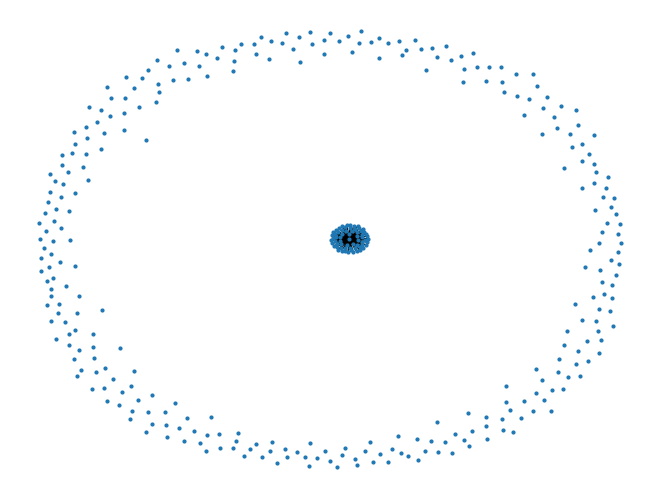

In [526]:
import random
k=370
random_nodes = random.sample(list(G.nodes), k)
G_sample = G.subgraph(random_nodes)
nx.draw(G_sample, node_size=4)
plt.savefig('graph1.png')

In [527]:
random_nodes[:3]

['Maxim A. Afanasyev', 'Daniil But', 'Ilya I. Zinovyev']

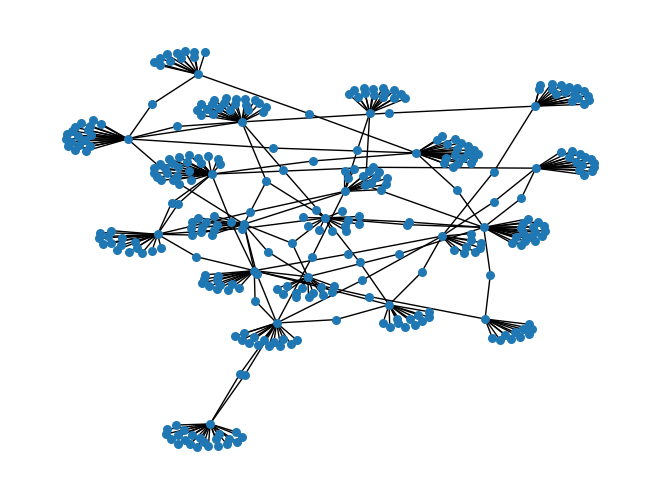

In [528]:
k=370
random_sample_edges = random.sample(list(G.edges), k)
G_sample1 = nx.Graph()
G_sample1.add_edges_from(random_sample_edges)
nx.draw(G_sample1, node_size=30)

plt.savefig('graph2.png')

#### Еще одна картинка сэмпла
#### Хотя ребер больше чем узлов 8499:2447
#### При 350 ребрах, 4% граф практически всегда (точная статистика, это дополнительный блокнот :) ) односвязный,
#### а при 350 узлах, 14%, много отдельных узлов!

#### Проверим, а как обстоит дело в топе.
#### Минимальное ребро появляется уже при 3-х топах ЧСС.
#### Denis Kazionov и Gennady Stolyarov пересекались в одной команде.

In [529]:
G

In [530]:
top_list

250

In [531]:
top_list=250

def graph_info1(top_list=top_list):
#if 1>0:
  merged_pl['flag']==1
  top_id = merged_pl[merged_pl['flag']==1].groupby(['link_x'])['link_y'].nunique().sort_values(ascending=False)[:int(top_list)].index.to_list()
  top_ids = play_together_names.query('link_x in @top_id')
  G_sample = G.subgraph(set(top_ids['player_x']))
  #G_sample.add_nodes_from(list(set(top_ids['player_x'])))
  return G_sample

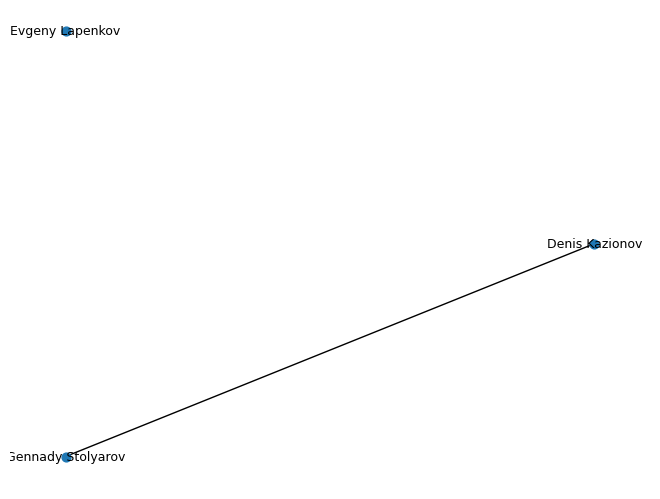

'plt.figure(2)\nnx.draw(G,pos,node_size=60,font_size=8) \n\n# larger figure size\nplt.figure(3,figsize=(12,12)) \nnx.draw(G,pos)\nplt.show()\n'

In [532]:
#Минимальная

top_list = 3
###graph = graph_info1(top_list=top_list)  # Предполагается, что функция graph_info1 возвращает объект графа NetworkX
graph = graph_info2(top_list, merged_pl, top_ids, G)

###nx.draw_circular(graph, with_labels=True, node_size=1000,font_size=8, figsize=(30,30)) #, linewidths=1000)
#plt.figure(1,figsize=(11,11))
###nx.draw_circular(graph, with_labels=True, node_size=40,font_size=9,edge_size=2) #, linewidths=1000)
nx.draw_circular(graph, with_labels=True, node_size=40,font_size=9) #, linewidths=1000)
plt.show()
###, dpi=1000
"""nx.draw(G)
nx.draw_random(G)
nx.draw_circular(G)
nx.draw_spectral(G)
nx.draw_spring(G)  """


##neato
###- "весна" модели макеты. Это инструмент по умолчанию используйте, если график не слишком велик (около 100 узлов), и вы ничего не знаете об этом. Neato пытается минимизировать глобальную энергетическую функцию, эквивалентную статистическому многомерному масштабированию.

##fdp
##- макеты "пружинной модели" похожи на макеты neato, но делают это, уменьшая силы, а не работая с энергией.

##sfdp - многомасштабная версия fdp для компоновки больших диаграммы.

##twopi - радиальные макеты, после Грэма Уиллса 97. Узлы размещаются на концентрических окружностях в зависимости от их расстояния от заданного корневого узла.

##circo - к
"""plt.figure(2)
nx.draw(G,pos,node_size=60,font_size=8)

# larger figure size
plt.figure(3,figsize=(12,12))
nx.draw(G,pos)
plt.show()
"""

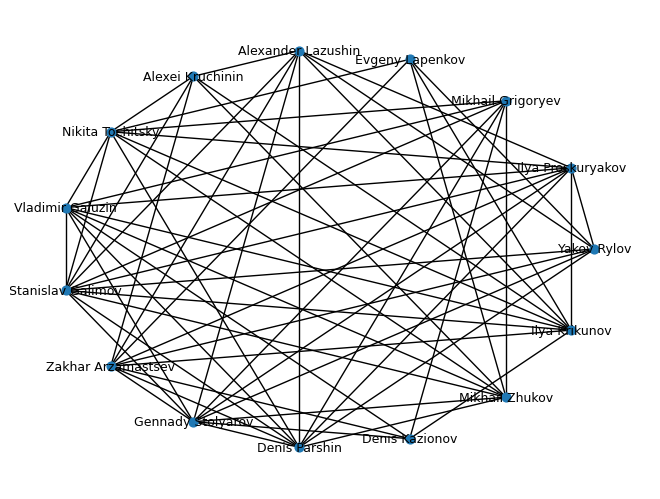

In [533]:
top_list=15
graph = graph_info2(top_list, merged_pl, top_ids, G)
nx.draw_circular(graph, with_labels=True, node_size=40,font_size=9) #, linewidths=1000)
#nx.draw_circular(graph_info2(graph, with_labels=True, node_size=40,font_size=9))
plt.show()

In [534]:
#Добавляем атрибут с информацией по расположению узлов (можно задать через set_attribute)
for node in G.nodes:
    G.nodes[node]['pos'] = list(pos[node])

In [535]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Hot',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [536]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('player: '+str(adjacencies[0])+ ' ' + '# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [537]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(width=1000, height=900,
                title='Граф топ-20 игроков и их связей',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [538]:
import os, holoviews as hv
os.environ['HV_DOC_HTML'] = 'true'

In [539]:
fig.write_html('demo_senkey4.html', auto_open=True)
####import chart_studio
####chart_studio.tools.set_credentials_file(username='EduardR7', api_key='qrRNEj3R56VI154PGcoT')
####import chart_studio.plotly as py
####py.plot(fig, filename = 'social_net_sens4', auto_open=True)

Визуализация графов с помощью Holoview:

https://holoviews.org/user_guide/Network_Graphs.html

Цвета в формате шестнадцатеричного кода: Вы можете указать цвет в формате шестнадцатеричного кода, например, '#FF0000' для красного цвета или '#00FF00' для зеленого цвета.

Именованные цвета: Вы также можете использовать именованные цвета, такие как 'red', 'green', 'blue', 'yellow', и т.д.

RGB-цвета: Вы можете указать цвета в формате RGB, например, (255, 0, 0) для красного цвета или (0, 255, 0) для зеленого цвета.

RGBA-цвета: Вы можете указать цвета в формате RGBA, где A представляет альфа-канал (прозрачность). Например, (255, 0, 0, 0.5) будет представлять полупрозрачный красный цвет.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
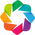

In [540]:
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

colors = ['#FF0000']+hv.Cycle('Category20').values

graph = hv.Graph.from_networkx(G, pos)

graph.opts(cmap=colors, node_size=4, edge_line_width=1,
              node_line_color= '#40BFBB')

hv.extension('bokeh')
hv.output(size=100)
output_file('demo_senkey6.html')
show(hv.render(graph))

In [541]:
output_file('demo_senkey6.html')

###hv.write_html('demo_senkey5.html', auto_open=True)
####import chart_studio
####chart_studio.tools.set_credentials_file(username='EduardR7', api_key='qrRNEj3R56VI154PGcoT')
####import chart_studio.plotly as py
####py.plot(fig, filename = 'social_net_sens4', auto_open=True)

#### Другой вариант этого графа - чем ближе к центру, тем меньше связей у игроков

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
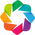

In [542]:

G = nx.from_pandas_edgelist(top_ids, 'player_x', 'player_y')
pos = nx.layout.shell_layout(G, lst)
for node in G.nodes:
    G.nodes[node]['pos'] = list(pos[node])

kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

colors = ['#000000']+hv.Cycle('Category20').values

graph = hv.Graph.from_networkx(G, pos)

graph.opts(cmap=colors, node_size=5, edge_line_width=0.5, edge_alpha=0.5,
              node_line_color='#40BFBB')

hv.extension('bokeh')
hv.output(size=100)
output_file('demo_senkey7.html')
show(hv.render(graph))

## Проверка гипотез

 #### Список наиболее популярных игроков

In [543]:
merged_pl.query('flag ==1').groupby(['player_x', 'link_x'])['link_y'].nunique().sort_values(ascending=False)[:20]

player_x              link_x
Evgeny Lapenkov       4351      475
Gennady Stolyarov     548       467
Denis Kazionov        14299     464
Vladimir Galuzin      14815     454
Denis Parshin         494       446
Alexander Lazushin    14674     445
Yakov Rylov           10546     443
Mikhail Grigoryev     14867     437
Ilya Proskuryakov     13871     436
Nikita Tochitsky      15846     430
Alexei Kruchinin      16355     423
Mikhail Zhukov        13679     418
Ilya Krikunov         125       416
Zakhar Arzamastsev    16220     413
Stanislav Galimov     14426     409
Yegor Milovzorov      14257     408
Mikhail Yunkov        595       407
Maxim A. Goncharov    14612     406
Konstantin Glazachev  266       406
Andrei Sergeyev       15416     402
Name: link_y, dtype: int64

### Правда ли, что игроки с низким значением ЧСС играли в среднем в большем количестве команд, чем игроки, у которых это значение больше?

In [544]:
merged_pl.head(1)

,player_link_x,player_x,team,start_date_x,end_date_x,link_x,player_link_y,player_y,start_date_y,end_date_y,link_y,flag
1,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Jokerit,2014-09-04,2016-03-02,16785,https://en.khl.ru/players/19127/?idplayer=1912...,Niclas Andersen,2017-11-17,2018-03-24,19127,0


In [545]:
# посчитаем количество команд у игроков
data_team = merged_pl.query('flag ==1').groupby(['player_x', 'link_x'],as_index = False)['team'].nunique().sort_values(by='team', ascending=False)
data_team.head(1)

,player_x,link_x,team
942,Denis Kazionov,14299,11


In [546]:
social_net.sort_values(by='number', ascending=False).head(1)

,link,number,player
2263,23560,3,Alexander Melikhov


In [547]:
merged_social_net = data_team.merge(social_net,left_on='link_x', right_on='link', how='left' )

In [548]:
merged_social_net.head()

,player_x,link_x,team,link,number,player
0,Denis Kazionov,14299,11,14299,2,Denis Kazionov
1,Alexander Ryazantsev,12990,11,12990,2,Alexander Ryazantsev
2,Gennady Stolyarov,548,11,548,2,Gennady Stolyarov
3,Yakov Rylov,10546,10,10546,1,Yakov Rylov
4,Mikhail Zhukov,13679,10,13679,1,Mikhail Zhukov


H0: Статистически значимой разницы в количестве команд, в которых играли игроки с низким значением числа Лемтюгова и игроки, у которых это значение больше, нет.

H1:Статистически значимая разница в количестве команд, в которых играли игроки с низким значением числа Лемтюгова и игроки, у которых это значение больше, есть.

In [549]:
from scipy import stats as st
import numpy as np

sample_1 = merged_social_net.loc[(merged_social_net['number']== 1)]['team']
sample_2 = merged_social_net.loc[(merged_social_net['number']> 1)]['team']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print(results.statistic, 'p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

25.53261899390074 p-значение: 1.2527327999523758e-132
Отвергаем нулевую гипотезу


Среднее количество команд ≈ 3.7, для игроков со значением ЧСС = [0,1]
<p> Среднее количество команд ≈ 1, для игроков со значением ЧСС = [3]

In [550]:
merged_social_net.loc[merged_social_net['number'] <2, 'team'].mean()

3.7205882352941178

In [551]:
merged_social_net.loc[merged_social_net['number'] >2, 'team'].mean()

1.03125

### Каково медианное значение ДГЗ?




In [552]:
social_net['number'].median()

2.0

Медианное значение числа Лемтюгова равно 2.

### Проверить, есть ли связь между количеством переходов и ростом/весом игрока (предполагаем, что игроки, у которых рост выше, лучше играют в хоккей и соответственно чаще переходят из клуба в клуб).

In [553]:
players.head(2)

,player_link,player,team,start_date,end_date,link
0,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Jokerit,2014-09-04,2016-03-02,16785
1,https://en.khl.ru/players/16785/?idplayer=1678...,Juhamatti Aaltonen,Metallurg Mg,2010-09-09,2012-03-22,16785


In [554]:
# найдем количество переходов у игроков
transition = players.groupby(['link', 'player'],as_index = False).agg(
    num_teams=('team', 'count')).sort_values(by='num_teams', ascending=False)
transition.head(2)

,link,player,num_teams
3482,4351,Evgeny Lapenkov,14
108,13679,Mikhail Zhukov,14


In [555]:
merged_pl['link_x'].nunique()

3720

In [556]:
stat_transition = stat_new[['link','player', 'hight', 'weight']]
stat_transition.head(2)

,link,player,hight,weight
0,16785,Juhamatti Aaltonen,184,89
1,17585,Miro Aaltonen,177,84


In [557]:
stat_transition['link'].nunique()

3717

In [558]:
#соединим таблицы с количеством переходов и данных о весе/росте игроков
merged_stat_transition = stat_transition.merge(transition,left_on='link', right_on='link', how='inner' )
merged_stat_transition.head(2)

,link,player_x,hight,weight,player_y,num_teams
0,16785,Juhamatti Aaltonen,184,89,Juhamatti Aaltonen,2
1,17585,Miro Aaltonen,177,84,Miro Aaltonen,3


Найдем медианные значения роста и вес игроков

In [559]:
median_height = merged_stat_transition['hight'].median()

In [560]:
merged_stat_transition['hight'].std()

5.640727353882319

In [561]:
merged_stat_transition['weight'].median()

87.0

H0: нет статистически значимой разницы в количестве переходов у игроков с разным ростом.

H1: есть статистически значимая разница в количестве переходов у игроков с разным ростом.

In [562]:
sample_3 = merged_stat_transition.loc[(merged_stat_transition['hight']<= median_height)]['num_teams']
sample_4 = merged_stat_transition.loc[(merged_stat_transition['hight']> median_height)]['num_teams']
print('Игроки менее 180см')
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_3, sample_4,  equal_var=False)

print(results.statistic, 'p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Игроки менее 180см
-1.6938623805254616 p-значение: 0.09038008649736448
Не получилось отвергнуть нулевую гипотезу


Да для двух групп до 184 см и после 184 см, эта связь не подтверждается.
<p> Давайте посмотрим, две группы 184см + сигма, и 184см - сигма

In [563]:
print(merged_stat_transition.loc[(merged_stat_transition['hight']<= median_height - merged_stat_transition['hight'].std())]['num_teams'].mean())
print(merged_stat_transition.loc[(merged_stat_transition['hight']> median_height + merged_stat_transition['hight'].std())]['num_teams'].mean())

2.105939004815409
2.2385466034755135


In [564]:
sample_3 = merged_stat_transition.loc[(merged_stat_transition['hight']<= 184 - merged_stat_transition['hight'].std())]['num_teams']
sample_4 = merged_stat_transition.loc[(merged_stat_transition['hight']> 184 + merged_stat_transition['hight'].std())]['num_teams']
print('Две группы выше 190см, и ниже 178см')
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_3, sample_4,  equal_var=False)

print(results.statistic, 'p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Две группы выше 190см, и ниже 178см
-1.2023148254027392 p-значение: 0.22947055229459914
Не получилось отвергнуть нулевую гипотезу


Подтвердить значимость не удалось.
Хотя средние заметно отличаются, вероятно проблема в количестве экспериментов

In [565]:
print(merged_stat_transition.loc[(merged_stat_transition['hight'] <= 184 - 2*merged_stat_transition['hight'].std())]['num_teams'].mean())
print(merged_stat_transition.loc[(merged_stat_transition['hight'] > 184 + 2*merged_stat_transition['hight'].std())]['num_teams'].mean())

2.017543859649123
2.208791208791209


H0: нет статистически значимой разницы в количестве переходов у игроков с разным весом.

H1: есть статистически значимая разница в количестве переходов у игроков с разным весом.

In [566]:
sample_5 = merged_stat_transition.loc[(merged_stat_transition['weight']<= merged_stat_transition['weight'].mean())]['num_teams']
sample_6 = merged_stat_transition.loc[(merged_stat_transition['weight']> merged_stat_transition['weight'].mean())]['num_teams']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_5, sample_6,  equal_var=False)

print(results.statistic, 'p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

-12.128834335977237 p-значение: 3.421893646926851e-33
Отвергаем нулевую гипотезу


Гипотезу о связи количества переходов и весом игрока принимаем.

Посмотрим на графиках:

Связь количества переходов и веса игрока

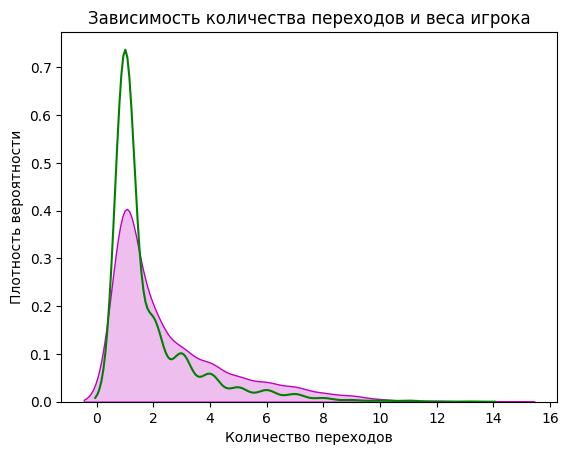

In [567]:
# Plotting the KDE Plot
sns.kdeplot(merged_stat_transition.loc[(merged_stat_transition['weight']<= 87),'num_teams'], color='g')#, Label=87)

sns.kdeplot(merged_stat_transition.loc[(merged_stat_transition['weight']> 87),'num_teams'], color='m')#, Label=87)
plt.title('Зависимость количества переходов и веса игрока')
plt.xlabel('Количество переходов')
plt.ylabel('Плотность вероятности');


Text(0, 0.5, 'Плотность вероятности')

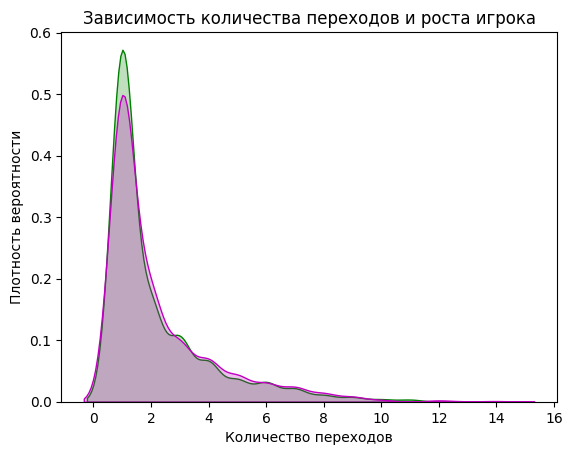

In [568]:
# Plotting the KDE Plot
sns.kdeplot(merged_stat_transition.loc[(merged_stat_transition['hight']<= 184),'num_teams'], color='g')#, Label=87)

sns.kdeplot(merged_stat_transition.loc[(merged_stat_transition['hight']> 184),'num_teams'], color='m')#, Label=87)
plt.title('Зависимость количества переходов и роста игрока')
plt.xlabel('Количество переходов')
plt.ylabel('Плотность вероятности')

In [569]:
stat_new['position'].value_counts()

forward       2061
defense       1165
goaltender     491
Name: position, dtype: int64

### Проверить, верна ли гипотеза о том, что более успешные хоккеисты рождаются в январе-марте.


## Вывод:
1. Мы обработали данные, полученнные с сайта https://en.khl.ru/.
2. Представили полученные данные как математическую абстакцию (ненаправленный граф)
3. С помощью преобразований Pandas, Numpy выделили игроков с наибольшим Числом социальных связей, ЧСС.
4. Рассчитали с помощью вспомогательных библиотек (Query или Heap) максимальные расстояния между вершинами графа, Диаметр графа знакомств (ДГЗ, число Эрдёша-Бэйкона, число Лемтюгова и т.д.).  ДГЗ в КХЛ, за все время с создания лиги, находится в промежутке от 0 до 3.
5. Выполнили различные иллюстрации графа.
6. Сделали несколько проверок гипотез.
  1. Доказали статистическую связь между ДГЗ и количеством переходов игрока.
  2. Показали, что нет, статистически значимой связи между ростом игрока и количеством переходов.
  3. Показали, что есть статистиически значимая связь между весом игрока и количеством переходов.

Список литературы.
https://plotly.com/python/network-graphs/

https://www.pythonforbeginners.com/data-structures/shortest-path-length-from-a-vertex-to-other-vertices-in-a-graph

 https://pimiento.github.io/python_graphs.html

https://habr.com/ru/articles/521894/ - форматирование таблиц в Pandas

https://vk.com/@meaning_data-pandas-in-jupiter-notebook - еще про форматирование

https://pythonist.ru/kak-ochistit-dannye-pri-pomoshhi-pandas/ - полезные приемы по очистке данных в pandas

https://pythonist.ru/rabota-s-bolshimi-dannymi-v-python-pri-pomoshhi-pandas-i-json/ - работаем с файлми JSON в pandas

https://seaborn.pydata.org/tutorial/distributions.html - о диаграммах распределения в seaborn. Как определить количество бинов, как использовать гистограммы для категориальных переменных

https://www.youtube.com/watch?v=dd3RcafdOQk - анализ данных в Python и Pandas, бесплатный видеокурс от Глеба Михайлова

https://techrocks.ru/2018/12/31/regex-learning-and-testing-tools/ - Инструменты для изучения и тестирования регулярных выражений

https://regexlearn.com/ru - 56 шагов к освоению регулярных выражений

https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7 - статья про корреляцию phik

https://colab.research.google.com/github/KaveIO/PhiK/blob/master/phik/notebooks/phik_tutorial_basic.ipynb - Colab Notebook по примерам расчета корреляции phik

Статьи про графы:

https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf

https://trenton3983.github.io/files/projects/2020-05-21_intro_to_network_analysis_in_python/2020-05-21_intro_to_network_analysis_in_python.html

https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

https://www.datacamp.com/tutorial/networkx-python-graph-tutorial